# Klasifikasi K-Nearest Neighbour (KNN)
### Dengan K = 10
Sumber : https://github.com/kk7nc/Text_Classification#id34 (Dengan Perubahan)

## Import module / package

In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from scipy.spatial import distance
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"data/tweets_labelled_tokenized_sastrawi.csv")
df2 = pd.read_csv(r"data/tweets_labelled_tokenized_ecs.csv")
df.head()

,tweet,polaritas,sentimen
0,"['jbharga', 'ayam', 'rm', 'tgk', 'telor', 'wya...",-2,Negatif
1,"['diri', 'di', 'atas', 'kaki', 'sendiri', 'ser...",-2,Negatif
2,"['sebab', 'harga', 'telur', 'anjlok', 'versi',...",5,Positif
3,"['turun', 'minta', 'masyarakat', 'telur', 'aya...",-1,Negatif
4,"['ternak', 'ayam', 'telur', 'aku', 'rugi', 'ra...",5,Positif


In [3]:
df2.head()

,tweet,polaritas,sentimen
0,"['jbharga', 'ayam', 'rm', 'tgk', 'telor', 'wya...",-2,Negatif
1,"['diri', 'di', 'atas', 'kaki', 'sendiri', 'ser...",-2,Negatif
2,"['sebab', 'harga', 'telur', 'anjlok', 'versi',...",5,Positif
3,"['turun', 'minta', 'masyarakat', 'telur', 'aya...",-1,Negatif
4,"['ternak', 'ayam', 'telur', 'menga', 'rugi', '...",4,Positif


## Split Data (Test & Train)

In [4]:
train_X_df, test_X_df, train_Y_df, test_Y_df = model_selection.train_test_split(df['tweet'], df['sentimen'], test_size = 0.1, random_state = 42)
train_X_df2, test_X_df2, train_Y_df2, test_Y_df2 = model_selection.train_test_split(df2['tweet'], df2['sentimen'], test_size = 0.1, random_state = 42)

In [5]:
data_train = pd.DataFrame()
data_train['tweet'] = train_X_df
data_train['sentimen'] = train_Y_df

data_test = pd.DataFrame()
data_test['tweet'] = test_X_df
data_test['sentimen'] = test_Y_df

data_train_2 = pd.DataFrame()
data_train_2['tweet'] = train_X_df2
data_train['sentimen'] = train_Y_df2

data_test_2 = pd.DataFrame()
data_test_2['tweet'] = test_X_df2
data_test_2['sentimen'] = test_Y_df2

## Klasifikasi Data dengan KNN (K = 10) dan Menampilkan Akurasi

### Dataset DF (_Stemming Nazief_)

In [6]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', KNeighborsClassifier(n_neighbors=10)),
                     ])

text_clf.fit(train_X_df, train_Y_df)
predicted = text_clf.predict(test_X_df)

print("K-Nearest Neighbors Accuracy:", accuracy_score(test_Y_df, predicted)*100, "%")
print("K-Nearest Neighbors Precision:", precision_score(test_Y_df, predicted, average="binary", pos_label="Positif")*100, "%")
print("K-Nearest Neighbors Recall:", recall_score(test_Y_df, predicted, average="binary", pos_label="Positif")*100, "%")
print("K-Nearest Neighbors f1_score:", f1_score(test_Y_df, predicted, average="binary", pos_label="Positif")*100, "%")

print(f'Confusion Matrix:\n {confusion_matrix(test_Y_df, predicted)}')
print('====================================================\n')
print(classification_report(test_Y_df, predicted, zero_division=0))

K-Nearest Neighbors Accuracy: 85.76388888888889 %
K-Nearest Neighbors Precision: 90.33613445378151 %
K-Nearest Neighbors Recall: 92.27467811158799 %
K-Nearest Neighbors f1_score: 91.29511677282377 %
Confusion Matrix:
 [[ 32  23]
 [ 18 215]]

              precision    recall  f1-score   support

     Negatif       0.64      0.58      0.61        55
     Positif       0.90      0.92      0.91       233

    accuracy                           0.86       288
   macro avg       0.77      0.75      0.76       288
weighted avg       0.85      0.86      0.86       288



K-Nearest Neighbors Accuracy: 85.76388888888889 %


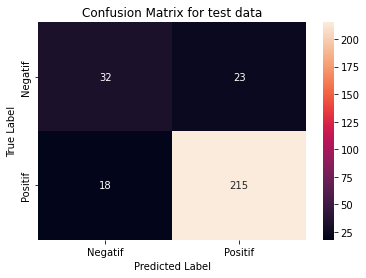

In [7]:
print("K-Nearest Neighbors Accuracy:", accuracy_score(test_Y_df, predicted)*100, "%")

conf_mat = confusion_matrix(test_Y_df, predicted)
class_label = ["Negatif","Positif"]
test =pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Dataset DF2 (_Stemming ECS_)

In [8]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', KNeighborsClassifier(n_neighbors=10)),
                     ])

text_clf.fit(train_X_df2, train_Y_df2)
predicted = text_clf.predict(test_X_df2)

print("K-Nearest Neighbors Accuracy:", accuracy_score(test_Y_df2, predicted)*100, "%")
print("K-Nearest Neighbors Precision:", precision_score(test_Y_df2, predicted, average="binary", pos_label="Positif")*100, "%")
print("K-Nearest Neighbors Recall:", recall_score(test_Y_df2, predicted, average="binary", pos_label="Positif")*100, "%")
print("K-Nearest Neighbors f1_score:", f1_score(test_Y_df2, predicted, average="binary", pos_label="Positif")*100, "%")

print(f'Confusion Matrix:\n {confusion_matrix(test_Y_df2, predicted)}')
print('====================================================\n')
print(classification_report(test_Y_df2, predicted, zero_division=0))

K-Nearest Neighbors Accuracy: 87.15277777777779 %
K-Nearest Neighbors Precision: 90.33613445378151 %
K-Nearest Neighbors Recall: 93.88646288209607 %
K-Nearest Neighbors f1_score: 92.07708779443254 %
Confusion Matrix:
 [[ 36  23]
 [ 14 215]]

              precision    recall  f1-score   support

     Negatif       0.72      0.61      0.66        59
     Positif       0.90      0.94      0.92       229

    accuracy                           0.87       288
   macro avg       0.81      0.77      0.79       288
weighted avg       0.87      0.87      0.87       288



K-Nearest Neighbors Accuracy: 87.15277777777779 %


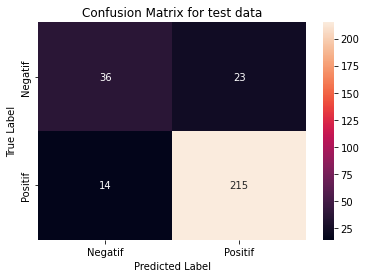

In [9]:
print("K-Nearest Neighbors Accuracy:", accuracy_score(test_Y_df2, predicted)*100, "%")

conf_mat = confusion_matrix(test_Y_df2, predicted)
class_label = ["Negatif","Positif"]
test =pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()